# Phase 4 Notes

## PCA Principal Component Analysis

In [ ]:
from scipy.special import gamma
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels as sm
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error as mse

%matplotlib inline

In [ ]:
packages = pd.read_csv('Phase4_Topic33_PCA/data/packages.csv')
packages.head(3)

In [ ]:
X = packages.drop(columns = ['Shipping Cost ($)'])
y = packages['Shipping Cost ($)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
scaler = StandardScaler()
X_tr_norm = scaler.fit_transform(X_train)
X_tt_norm = scaler.transform(X_test)

### PCA in `sklearn`

In [54]:
pca = PCA(n_components=2) # Check out how `n_components` works

X_tr_pca = pca.fit_transform(X_tr_norm)   #x_train fit and transformed by the pca

NameError: name 'PCA' is not defined

In [ ]:
pca.explained_variance_ #varience of corr matrix

In [ ]:
sm2 = LinearRegression()
sm2.fit(X_tr_pca, y_train)

In [ ]:
sm2.score(X_tr_pca, y_train)

### Steps for Performing PCA

The theory behind PCA rests upon many foundational concepts of linear algebra. After all, PCA is re-encoding a dataset into an alternative basis (the axes). Here are the exact steps:
1. Recenter each feature of the dataset by subtracting that feature's mean from the feature vector
2. Calculate the covariance matrix for your centered dataset
3. Calculate the eigenvectors of the covariance matrix
    1. You'll further investigate the concept of eigenvectors in the upcoming lesson
4. Project the dataset into the new feature space: Multiply the eigenvectors by the mean-centered features

### Order of modeling
- x train
- standard scale
- pca

### Alternative dimention reduction
- UMAP
- LLE laplacian embedding
- LPP locality preserving projections

## Clustering and K-Means 

### Example

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(1)
from sklearn.cluster import KMeans

#### Example 1

In [ ]:
X, y = make_blobs(n_samples = 400, n_features = 2, centers = 6, cluster_std = .8)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=10);

In [ ]:
k_means = KMeans(n_clusters = 6)

k_means.fit(X)

predicted_clusters = k_means.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=predicted_clusters, s=10);
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=70);

#### Example 2

In [2]:
X_2, y_2 = make_blobs(n_samples=400, n_features=2, centers=np.random.randint(3,8), cluster_std = .8)

With unknown n of clusters/k we create a different version of the model with different k's and make an elbow plot to find the best k

In [3]:
#instantiate and fit `KMeans` with a different value for `n_clusters` between 3 and 7, inclusive.
k_means_3 = KMeans(n_clusters=3).fit(X_2)
k_means_4 = KMeans(n_clusters=4).fit(X_2)
k_means_5 = KMeans(n_clusters=5).fit(X_2)
k_means_6 = KMeans(n_clusters=6).fit(X_2)
k_means_7 = KMeans(n_clusters=7).fit(X_2)

k_list = [k_means_3, k_means_4, k_means_5, k_means_6, k_means_7]

In [4]:
from sklearn.metrics import calinski_harabasz_score

In [10]:
CH_score = []

for model in k_list:
    labels = model.labels_
    score = calinski_harabasz_score(X_2, labels)
    CH_score.append(score)

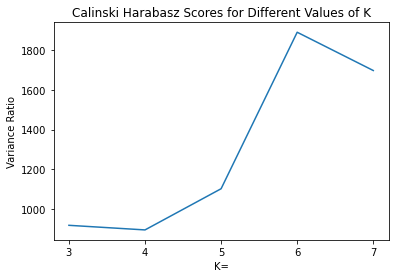

In [11]:
plt.plot([3, 4, 5, 6, 7], CH_score)
plt.xticks([3,4,5,6,7])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.show()

In [7]:
wcss_score = []

for model in k_list:
    labels = model.labels_
    inertia = model.inertia_
    wcss_score.append(inertia)

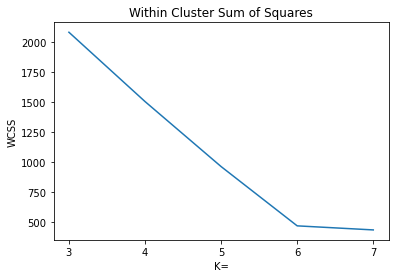

In [8]:
plt.plot([3, 4, 5, 6, 7], wcss_score)
plt.xticks([3,4,5,6,7])
plt.title('Within Cluster Sum of Squares')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.show()

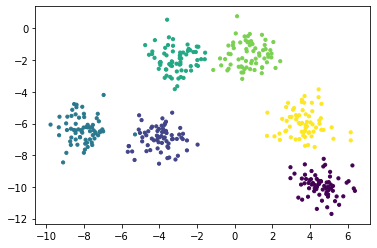

In [9]:
plt.scatter(X_2[:, 0], X_2[:, 1],c=y_2, s=10)

## Agglomerative Hierarchical Clustering

grouping things together in more and more general ways until you have everything in one group

Distance notions:
- Euclidean or Manhattan
- Hamming
- Damerau-Levenshtein distance: how many single item changes to get to result

#### Merge criterion: cluster distance evaluation:

ways to cluster things given their distance aka **linkage**

best approaches
- ward 
- single 

other approaches
- centroid
- complete
- average

#### Agglomerative Hierarchical Clustering in Python
- See it in action

In [15]:
# Imports

import sys, os
import seaborn as sns
ex_path = os.path.abspath(os.pardir)
if ex_path not in sys.path:
    sys.path.append(ex_path)

from sklearn.datasets import make_blobs
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.datasets import make_blobs, make_moons, load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

from copy import deepcopy

%matplotlib inline

In [16]:
# defines metric and calculates pair-wise distance between points 
from scipy.spatial.distance import pdist 

#for reshaping distance matrix 
from scipy.spatial.distance import squareform


In [18]:
import pandas as pd
agg_data = pd.read_csv('Phase4_Topic35_Clustering/HierarchicalClustering/Data/Aggregation.txt', header = None, usecols = [0,1], delimiter = '\t')
agg_data.columns = ['X', 'Y']
agg_data.head()

,X,Y
0,15.55,28.65
1,14.90,27.55
2,14.45,28.35
3,14.15,28.80
4,13.75,28.05


<AxesSubplot:xlabel='X', ylabel='Y'>

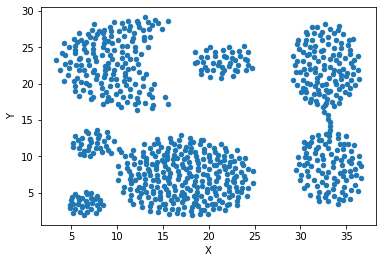

In [19]:
agg_data.plot(x = 'X', y = 'Y', kind = 'scatter')

In [20]:
#At each step: algorithm calculates matrix of linkage distances between clusters
# computes the pairwise distance and returns a condensed array
#removes diagonal terms and flattens array
condensed_dist = pdist(agg_data, metric = 'euclidean' ) 
condensed_dist

array([1.27769323, 1.14017543, 1.40801278, ..., 0.5       , 0.82764727,
       0.45276926])

In [21]:
#Each column(row) indexes cluster and distance

sqp = squareform(condensed_dist)

sqpdf = pd.DataFrame(sqp, index = agg_data.index,
            columns = agg_data.index)

sqpdf

,0,1,2,3,4,5,6,7,8,9,...,778,779,780,781,782,783,784,785,786,787
0,0.000000,1.277693,1.140175,1.408013,1.897367,2.209072,2.598557,2.394264,2.902585,3.041792,...,26.130107,25.774503,25.347830,25.757572,26.436717,26.460395,26.964050,26.360245,26.182294,25.736793
1,1.277693,0.000000,0.917878,1.457738,1.253994,1.792345,2.483948,1.450862,1.671077,2.109502,...,24.871269,24.523509,24.104045,24.512242,25.189730,25.220032,25.728632,25.128669,24.944739,24.498265
2,1.140175,0.917878,0.000000,0.540833,0.761577,1.104536,1.656050,1.312440,2.035927,1.929378,...,25.472976,25.148062,24.746363,25.150795,25.824020,25.869335,26.387876,25.795591,25.600049,25.151789
3,1.408013,1.457738,0.540833,0.000000,0.850000,0.873212,1.202082,1.476482,2.364847,1.981161,...,25.805135,25.494166,25.103386,25.505392,26.175800,26.230231,26.754672,26.167251,25.964688,25.515485
4,1.897367,1.253994,0.761577,0.850000,0.000000,0.565685,1.331353,0.626498,1.557241,1.180042,...,24.968831,24.663434,24.277819,24.678584,25.347584,25.406544,25.934147,25.349606,25.143041,24.693370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,26.460395,25.220032,25.869335,26.230231,25.406544,25.706274,26.318815,24.802117,23.865509,24.515301,...,1.835756,1.180042,1.151086,0.824621,0.585235,0.000000,0.650000,0.707107,0.360555,0.738241
784,26.964050,25.728632,26.387876,26.754672,25.934147,26.240808,26.860054,25.332242,24.389854,25.054391,...,2.381701,1.817966,1.761391,1.470544,1.131371,0.650000,0.000000,0.672681,0.801561,1.253994
785,26.360245,25.128669,25.795591,26.167251,25.349606,25.662473,26.288020,24.750051,23.802783,24.480605,...,2.507987,1.750000,1.408900,1.272792,1.285496,0.707107,0.672681,0.000000,0.500000,0.827647
786,26.182294,24.944739,25.600049,25.964688,25.143041,25.447446,26.064727,24.540273,23.599841,24.259637,...,2.024846,1.250000,0.982344,0.781025,0.850000,0.360555,0.801561,0.500000,0.000000,0.452769


In [22]:
from scipy.cluster.hierarchy import linkage

In [23]:
np_linkage = linkage(condensed_dist, method='ward', metric='euclidean' )

In [26]:
#linkage(condensed pair-wise distance, linkage method, metric)
#returns an entire sequence of cluster merges in agglomerative process.

cols = ['clst1', 'clst2', 'dist', 'num_points']
linkage_df = pd.DataFrame(np_linkage,
                          columns = cols)
linkage_df.index.name = 'merge'
linkage_df

,clst1,clst2,dist,num_points
merge,,,,
0,185.0,186.0,0.111803,2.0
1,671.0,672.0,0.150000,2.0
2,79.0,80.0,0.158114,2.0
3,433.0,434.0,0.158114,2.0
4,366.0,367.0,0.180278,2.0
...,...,...,...,...
782,1549.0,1565.0,91.581936,175.0
783,1567.0,1569.0,109.894662,341.0
784,1562.0,1570.0,158.954338,277.0


In [27]:
from scipy.cluster.hierarchy import dendrogram

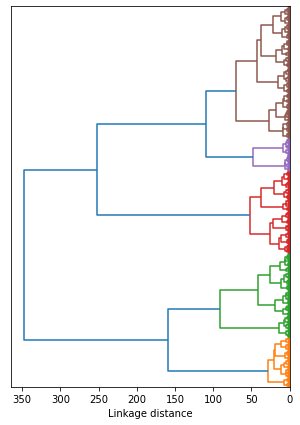

In [28]:
fig, ax = plt.subplots(figsize = (5,7))
dendrogram(linkage_df, no_labels = True, leaf_font_size = 8, color_threshold = 100,  orientation = 'left' )
ax.set_xlabel('Linkage distance')
plt.show() #color_threshold = 100 indicates that the cutoff for cluster is at a distance of 100

In [29]:
from scipy.cluster.hierarchy import fcluster
from copy import deepcopy

In [38]:
#want to output "flattened" cluster assignments:
#scipy's fcluster function: fcluster(linkage_matrix, threshold, criterion)

# criterion as linkage distance is fairly common
clust_assgn = fcluster(linkage_df, t = 80, criterion = 'distance')

#put labels into dataframe and scatterplot
agg_assigned = deepcopy(agg_data)
agg_assigned['label'] = clust_assgn

In [39]:
agg_assigned #every datapoint and which cluster they are in based on our threshold of 100

,X,Y,label
0,15.55,28.65,4
1,14.90,27.55,4
2,14.45,28.35,4
3,14.15,28.80,4
4,13.75,28.05,4
...,...,...,...
783,7.80,3.35,5
784,8.05,2.75,5
785,8.50,3.25,5
786,8.10,3.55,5


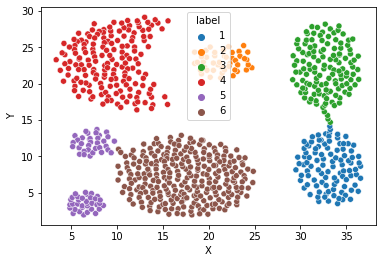

In [40]:
n_labels = len(agg_assigned['label'].unique())
fig, ax = plt.subplots(figsize = (6,4))
sns.scatterplot(x = 'X', y = 'Y',
                hue = 'label', 
                data = agg_assigned, 
                palette=sns.color_palette(
                    'tab10', n_labels), ax = ax)

plt.show()

#### Cophenetic correlation coefficient

- correlation between point pairwise distance and linkage distance at which pairs are joined.

- how closely related is the agglomerative clustering to the underlying data structure?


- Is a correlation coefficient: 
    - 1 = perfect correlation
    - 0 = no correlation
    - -1 = anti-correlation

In [41]:
from scipy.cluster.hierarchy import cophenet

In [42]:
# evaluate effectiveness of hierarchical clustering with cophenetic correlation
corr_coef, cophen_dist = cophenet(np_linkage, condensed_dist)
print(corr_coef)

0.7838115721710462


#### Hierarchical clustering with `sklearn` 

- Scipy has much better functionality for exploring full hierarchy
- Sklearn for using hierarchical clustering in flat clustering/prediction tasks
- can specify number of clusters, adjusts threshold automatically.


In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
# affinity is distance metric(euclidean, manhattan)
# linkage (average, complete, single, ward, etc.)
agg_cluster = AgglomerativeClustering(n_clusters = 7,
                                      affinity = 'euclidean', 
                                      linkage = 'average')
agg_cluster

AgglomerativeClustering(linkage='average', n_clusters=7)

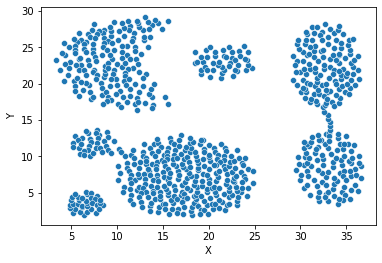

In [46]:
sns.scatterplot(x = 'X', y = 'Y', data = agg_data)
plt.show()

In [49]:
agg_labels = agg_cluster.fit_predict(agg_data)
sklearn_agg_data = deepcopy(agg_data)
sklearn_agg_data['labels'] = agg_labels
sklearn_agg_data

,X,Y,labels
0,15.55,28.65,0
1,14.90,27.55,0
2,14.45,28.35,0
3,14.15,28.80,0
4,13.75,28.05,0
...,...,...,...
783,7.80,3.35,6
784,8.05,2.75,6
785,8.50,3.25,6
786,8.10,3.55,6


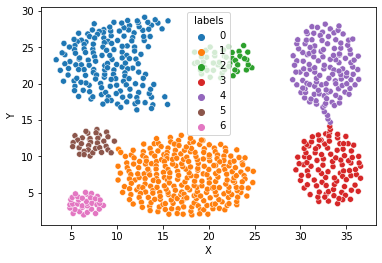

In [48]:
sns.scatterplot(x = 'X', y = 'Y', 
                hue = 'labels', palette = 'tab10',
                data = sklearn_agg_data)
plt.show()

#### Evaluation

Operating in this flat mode:
- getting reasonable cluster number -- silhouette score.
- not a sure fire method but not terrible either.

In [50]:
def plot_silh_scores(X, K, increment, linkage):

    klist = np.arange(2,K,increment)
    score_list = []
    for k in klist:
        agg_clstrer = AgglomerativeClustering(n_clusters = k,
                                      affinity = 'euclidean', 
                                      linkage = linkage)
        
        clstr_labels = agg_clstrer.fit_predict(X)

        score = silhouette_score(X, clstr_labels)
        score_list.append(score)
        
    sns.lineplot(x = klist, y = score_list, color = 'r')
    plt.ylabel('Silhouette Coefficient')
    plt.xlabel('K')
    plt.title('Silhouette coefficient plot')
    plt.show()

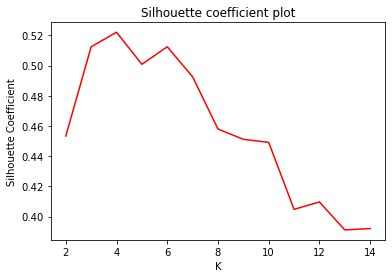

In [51]:
plot_silh_scores(agg_data, 15, 1, 'average')

In [52]:
def plot_with_sklearn(X, k, linkage):
    agg_cluster = AgglomerativeClustering(n_clusters = k,
                                      affinity = 'euclidean', 
                                      linkage = linkage)
    
    agg_labels = agg_cluster.fit_predict(X)
    sklearn_agg_data = deepcopy(X)
    sklearn_agg_data['labels'] = agg_labels
    
    sns.scatterplot(x = 'X', y = 'Y', 
                hue = 'labels', palette = 'tab10',
                data = sklearn_agg_data)
    plt.show()


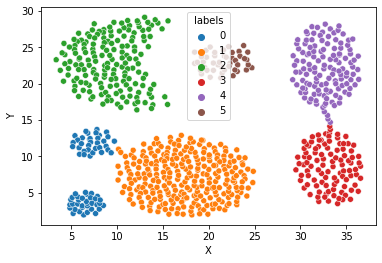

In [53]:
plot_with_sklearn(agg_data, 6, 'average')

## Recomendation Engines

### Content based recomendations

#### Summary of this class of content-based recommenders

- Items characteristics (or features) get encoded by experts
- Learn which of the features user cares about (user vector) through their rating of items.
- Predict and rank on item database given user vector for recommendations.

### Collaberative filtering

- User Based
- Item Based

## NLP

Definitions:
- **NLP**: Natural Language Processing
- **NLTK**: Natural Language Tool Kit\
- **Regex**: Regular expressions
- **Stemming**: technique for removing suffixes from words
- **Lemmatization**: technique for removing suffixes from words
- **POS**: Part of speech tagging; helping a computer understand how to interpret a sentance
- **CFG**: Context Free Grammer; gramatically correct text that makes no sense semanticly
- **BoW**: Bag of Words; Vectorized text, a bag that contains every word in a corpus and their frequency

In [2]:
# takes in untokenized document and returns fully normalized token list
def process_doc(doc):

    #initialize lemmatizer
    wnl = WordNetLemmatizer()

    # helper function to change nltk's part of speech tagging to a wordnet format.
    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        else:         
            return None
        
    # remove stop words and punctuations, then lower case
    doc_norm = [tok.lower() for tok in word_tokenize(doc) if ((tok.isalpha()) & (tok not in stop_words)) ]

    #  POS detection on the result will be important in telling Wordnet's lemmatizer how to lemmatize
    
    # creates list of tuples with tokens and POS tags in wordnet format
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(doc_norm))) 
    doc_norm = [wnl.lemmatize(token, pos) for token, pos in wordnet_tagged if pos is not None]
    
    return doc_norm

## Neural Networks

### Architecture 

the activation function allows you to learn interesting relations between features

most important activation functions
- Sigmoid
- ReLU

<center><img src = "Phase4_Topics40to42_NeuralNetworks/NNArchitecture/images/activation_func.png" >
Typical choices for activation function $g$</center>

matrix shapes

D = number of features

ex D = 64


N0/Xn = 4

N1 = 4

N2 = 3

N number of columns/nodes

w 1 transpose (4/N0,64/D)

w 2 transpose (3/N2,4/N1)

### Keras

Keras has two major neural network construction frameworks:
- Sequential vs Functional API

Sequential API:

<img src = "Phase4_Topics40to42_NeuralNetworks/IntroKerasTensorflow/images/sequentialvsfunctional.png" >

<center>Apt for simpler feedforward network topologies.</center>

Functional API:

<center><img src = "Phase4_Topics40to42_NeuralNetworks/IntroKerasTensorflow/Images/skipconnection.png" ></center>

Skip connections, branching, etc.
